## 任务2 对每个居民客户的用电缴费情况按照上述四种居民客户类型进行归类，结果保存为
   ## ”居民客户的用电缴费习惯分析 2.csv”

### 1.1 导入相关python库

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
from pylab import *
import numpy as np
import os

### 1.2 探索数据

数据来源于电力客户行为分析任务1输出的结果保存的数据'居民客户的用电缴费习惯分析 1.csv'

In [6]:
data = pd.read_csv('居民客户的用电缴费习惯分析 1.csv')     # 读取excel文件
print(data.head())

      user_id  平均缴费次数   平均缴费金额
0  1000000001       8  123.375
1  1000000002       7   70.000
2  1000000003       7  168.571
3  1000000004       8   77.625
4  1000000005       7  214.286


#### 计算用户总平均缴费金额和总平均缴费次数

In [8]:
maxmoney=0
for i in range(0,100):
    maxmoney+=data.iloc[i,2]
avgmoney='%.3f'%(maxmoney/100)
print(f"总平均缴费金额为：{avgmoney}")

总平均缴费金额为：105.842


In [9]:
maxtimes=0
for i in range(0,100):
    maxtimes+=data.iloc[i,1]
avgtimes=round(maxtimes/100)
print(f"总平均缴费次数为：{avgtimes}")

总平均缴费次数为：7


### 1.3对用户进行分类

依照标准为中国软件杯官网A5-电力客户行为分析 赛题业务场景模块所提供的标准，具体如下图所示：

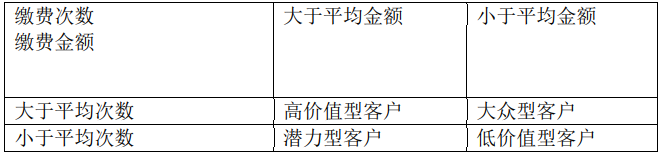

In [13]:
a1="高价值型客户"
a2="大众型客户"
a3="潜力型客户"
a4="低价值型客户"
total=[]
for i in range(0,100):
    person=[]
    person.append(data.iloc[i,0])
    if data.iloc[i,1]>=avgtimes and data.iloc[i,2]>=float(avgmoney):
        person.append(a1)
    elif data.iloc[i,1]>=avgtimes and data.iloc[i,2]<float(avgmoney):
        person.append(a2)
    elif data.iloc[i,1]<avgtimes and data.iloc[i,2]>=float(avgmoney):
        person.append(a3)
    elif data.iloc[i,1]<avgtimes and data.iloc[i,2]<float(avgmoney):
        person.append(a4)
    total.append(person)
names = ["user_id","用户价值类型"]
test = pd.DataFrame(columns = names,data=total)
test.to_csv('居民客户的用电缴费习惯分析 2.csv',index=False,encoding='utf_8_sig')

对用户分类后的数据前5行为

In [15]:
test.head()

user_id  用户价值类型
0  1000000001  高价值型客户
1  1000000002   大众型客户
2  1000000003  高价值型客户
3  1000000004   大众型客户
4  1000000005  高价值型客户

### 1.4对用户价值类型不同客户的占比进行统计和相关可视化

In [23]:
df2=test.groupby("用户价值类型").agg({"用户价值类型":"count"})
df2["不同客户的占比"]=df2["用户价值类型"].apply(lambda x:x/np.sum(df2["用户价值类型"]))
df2.head()

用户价值类型  不同客户的占比
用户价值类型                 
低价值型客户      20     0.20
大众型客户       41     0.41
潜力型客户       10     0.10
高价值型客户      29     0.29

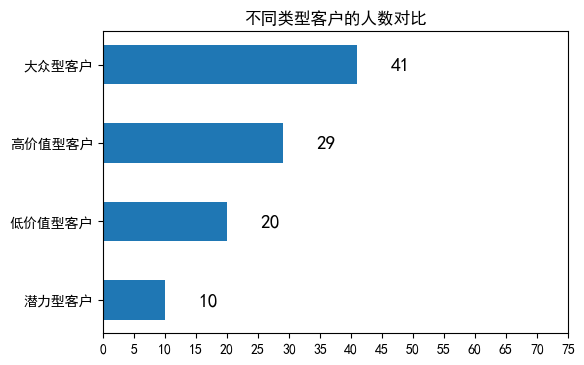

In [26]:
#绘制不同类型客户的人数对比的条形图
mpl.rcParams['font.sans-serif'] = ['SimHei']
df2=df2.sort_values(by="不同客户的占比",ascending=True)
plt.figure(figsize=(6,4),dpi=100)
x=df2.index
y=df2["用户价值类型"]
plt.barh(x,height=0.5,width=y,align="center")
plt.title("不同类型客户的人数对比")
for x,y in enumerate(y):
    plt.text(y+7,x,y,ha="center",va="center",fontsize=14)
plt.xticks(np.arange(0,80,5))
plt.tight_layout
plt.savefig("不同类型客户的人数对比",dpi=300)

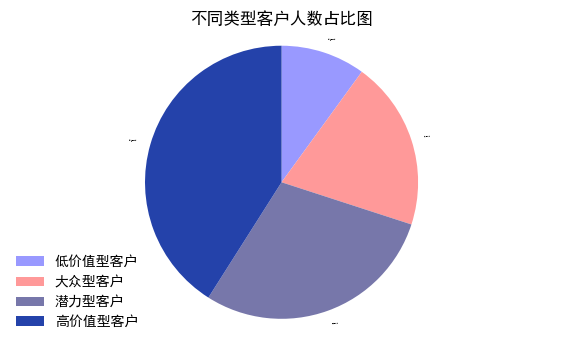

In [28]:
#绘制不同类型客户人数占比图
df2=test.groupby("用户价值类型").agg({"用户价值类型":"count"})
df2["不同客户的占比"]=df2["用户价值类型"].apply(lambda x:x/np.sum(df2["用户价值类型"]))
df2=df2.sort_values(by="不同客户的占比",ascending=True)
plt.figure(figsize=(7,4),dpi=100)
x1=df2["不同客户的占比"]
labels=['低价值型客户', '大众型客户', '潜力型客户', '高价值型客户']
colors=['#9999ff','#ff9999','#7777aa','#2442aa']
explode=[0,0,0,0]
patches,l_text=plt.pie(x1,labels=labels,colors=colors,explode=explode,startangle=90,counterclock=False)
for t in l_text:
    t.set_size(0)
plt.axis("equal")
plt.legend(loc=(0.001,0.001),frameon=False)
plt.title("不同类型客户人数占比图")
plt.savefig("不同类型客户人数占比图",dpi=300)

综上所述，大众型客户人数最多，占有总数的41%